In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import copy
import datetime as dt

In [13]:
# Esta es la parte que requiere input del usuario
# inicializacion de las condiciones : año, mes (o meses), punto de interes (lat y lon), tamaño de grid deseado
year = 2020
months = np.arange(1,7)                           # np.arange(n,m) genera un arreglo con primer elemento n y ultimo m-1
latpoint = 19.5                                   # latitud del punto de interes
lonpoint = -98.5                                  # longitud del punto de interes
gridsize = 0.4                                    # tamanyo del grid en fraccion de grados

In [ ]:
# Necesita editarse para permitir multigrid
# esto es para seleccionar los grids en el hdf donde se encuentran los datos de interes
gridlat = int(latpoint)
gridlon = int(lonpoint)
gridname = '%iN%iW' % (int(latpoint),int(lonpoint))
print(gridname)

In [14]:
# contadores inevitables
cont = 0                              # para saber que hacer si la matriz de datos ya se creo o no

no hay datos para 2019-01
no hay datos para 2019-02
no hay datos para 2019-03
no hay datos para 2019-04
no hay datos para 2019-05
no hay datos para 2019-06
no hay datos para 2019-07
no hay datos para 2019-10
no hay datos para 2019-11
no hay datos para 2019-12
no hay datos para 2020-01
no hay datos para 2020-04
no hay datos para 2020-05
no hay datos para 2020-06
no hay datos para 2020-07
no hay datos para 2020-08
no hay datos para 2020-09
no hay datos para 2020-10
no hay datos para 2020-11
no hay datos para 2020-12


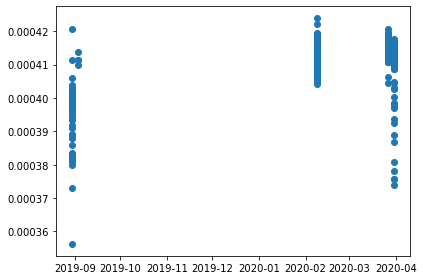

In [15]:
# algoritmo para generar la matriz de todos los datos en el grid 1x1 de los diferentes hdf
# este arrojara la matriz que despues se filtrara para hacer las series de tiempo
for year in years:
    for month in months:
        h5file = "f:\\CCA\\NASAGESDISC\\mexico\\mexico_oco3_early_%i%02i.h5" %(year,month)
        #print(h5file)
        try:
            data = h5py.File(h5file,'r')
        
            # expande los vectores para concatenar y toma los datos del grid en donde esta el punto
            # genera un objeto datetime a partir del valor de tepoch
            lat = np.expand_dims(data[gridname]['lat'],axis=1)
            lon = np.expand_dims(data[gridname]['lon'],axis=1)
            xco2 = np.expand_dims(data[gridname]['/RetrievalResults/xco2'],axis=1)
            t_epoch = data[gridname]['tepoch']
            time = np.array([dt.datetime.utcfromtimestamp(ele) for ele in t_epoch])
            time = np.expand_dims(time,axis=1)
        
            # concatena los 4 vectores Nx1 en una matriz temporal Nx4
            mat=np.concatenate((time,lat,lon,xco2),axis=1)
        
        
            if cont == 0:
                # copia la matriz temporal en una permanente
                # esto solo se debe usar si no existe ya la matriz permanente
                datos=copy.copy(mat)
            
            else:
                # concatena los datos de la matriz temporal en la permanente
                # esto solo se debe usar si ya existe la matriz permanente
                datos=np.concatenate((mat,datos),axis=0)
            
            data.close()
            cont = cont + 1
        
        except:
            print('no hay datos para %i-%02i' %(year,month))
            continue
    
# condiciones para reducir el tamaño del grid alrededor del punto seleccionado y obtener datos dentro ded ese nuevo grid

gridcond = ((datos[:,1] < (latpoint + gridsize)) & (datos[:,1] > (latpoint - gridsize)) & (datos[:,2] < (lonpoint + gridsize)) & (datos[:,2] > (lonpoint - gridsize)))
#print(gridcond) 

# grafica una serie de tiempo sencilla con los datos filtrados por las condiciones
plt.plot_date(datos[:,0][gridcond],datos[:,3][gridcond]) 
plt.tight_layout() 
plt.show()